In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fish.csv')
data.head(n=10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
data.shape

(159, 7)

In [4]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
le = preprocessing.LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int32  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.2 KB


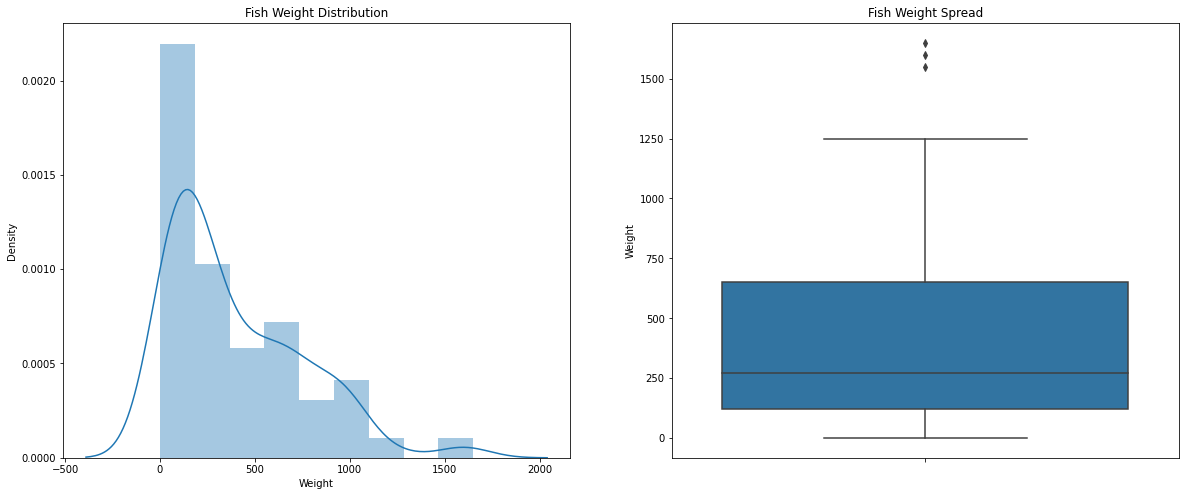

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fish Weight Distribution')
sns.distplot(data.Weight)

plt.subplot(1,2,2)
plt.title('Fish Weight Spread')
sns.boxplot(y=data.Weight)
plt.show()

In [8]:
print(data.Weight.describe(percentiles = [0.25,0.50, 0.75, 0.85, 0.90, 1]))

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
85%       820.000000
90%       930.000000
100%     1650.000000
max      1650.000000
Name: Weight, dtype: float64


In [9]:
temp = data.copy()
temp['Length1'] = temp['Length1'].astype('int')
temp['Length2'] = temp['Length2'].astype('int')
temp['Length3'] = temp['Length3'].astype('int')

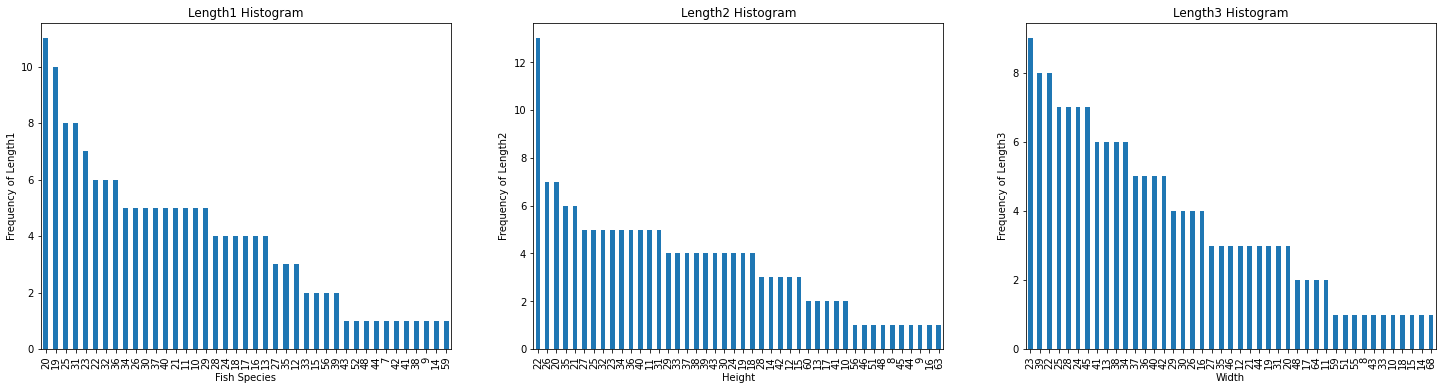

In [10]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = temp.Length1.value_counts().plot(kind='bar')
plt.title('Length1 Histogram')
plt1.set(xlabel = 'Fish Species', ylabel = 'Frequency of Length1')

plt.subplot(1,3,2)
plt1 = temp.Length2.value_counts().plot(kind='bar')
plt.title('Length2 Histogram')
plt1.set(xlabel = 'Height', ylabel = 'Frequency of Length2')

plt.subplot(1,3,3)
plt1 = temp.Length3.value_counts().plot(kind='bar')
plt.title('Length3 Histogram')
plt1.set(xlabel = 'Width', ylabel = 'Frequency of Length3')

plt.show()

<Figure size 1800x432 with 0 Axes>

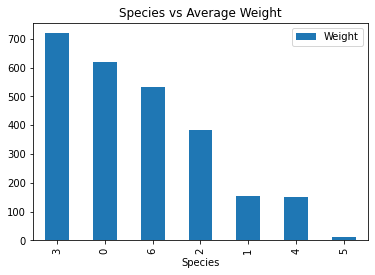

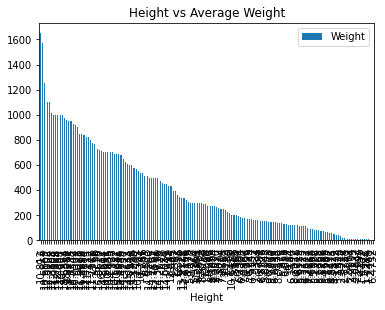

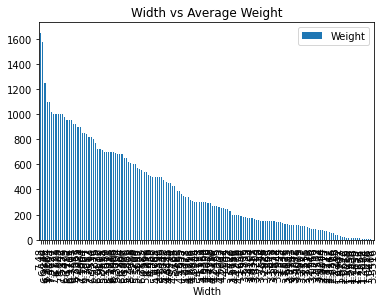

In [27]:
plt.figure(figsize=(25,6))

df = pd.DataFrame(temp.groupby(['Species'])['Weight'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Species vs Average Weight')
plt.show()

df = pd.DataFrame(temp.groupby(['Height'])['Weight'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Height vs Average Weight')
plt.show()

df = pd.DataFrame(temp.groupby(['Width'])['Weight'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Width vs Average Weight')
plt.show()

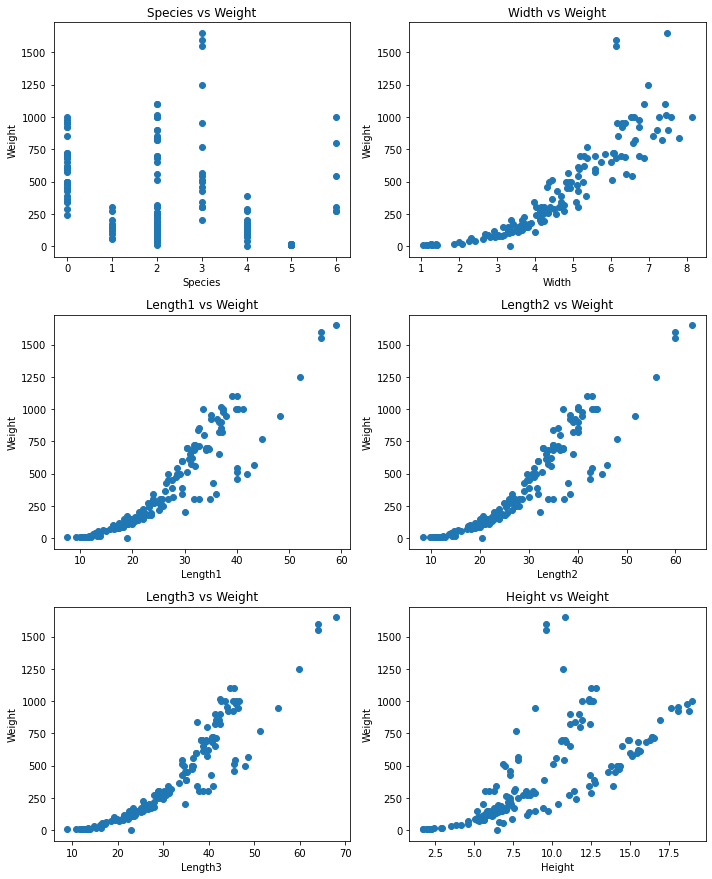

In [12]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['Weight'])
    plt.title(x+' vs Weight')
    plt.ylabel('Weight')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))
    
scatter('Species',1)
scatter('Width',2)
scatter('Length1',3)
scatter('Length2',4)
scatter('Length3',5)
scatter('Height',6)
    
plt.tight_layout()
    

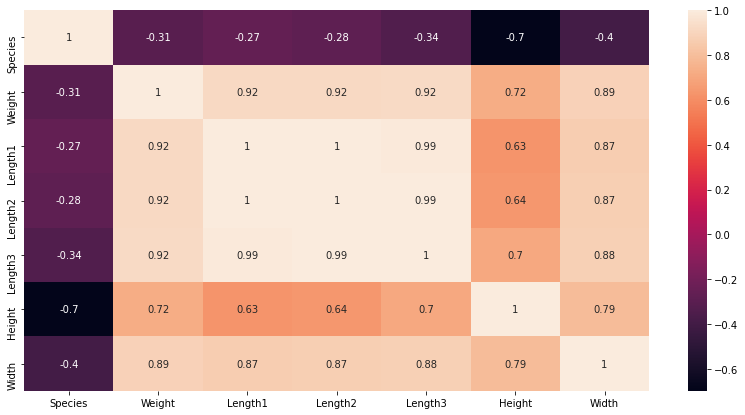

In [13]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

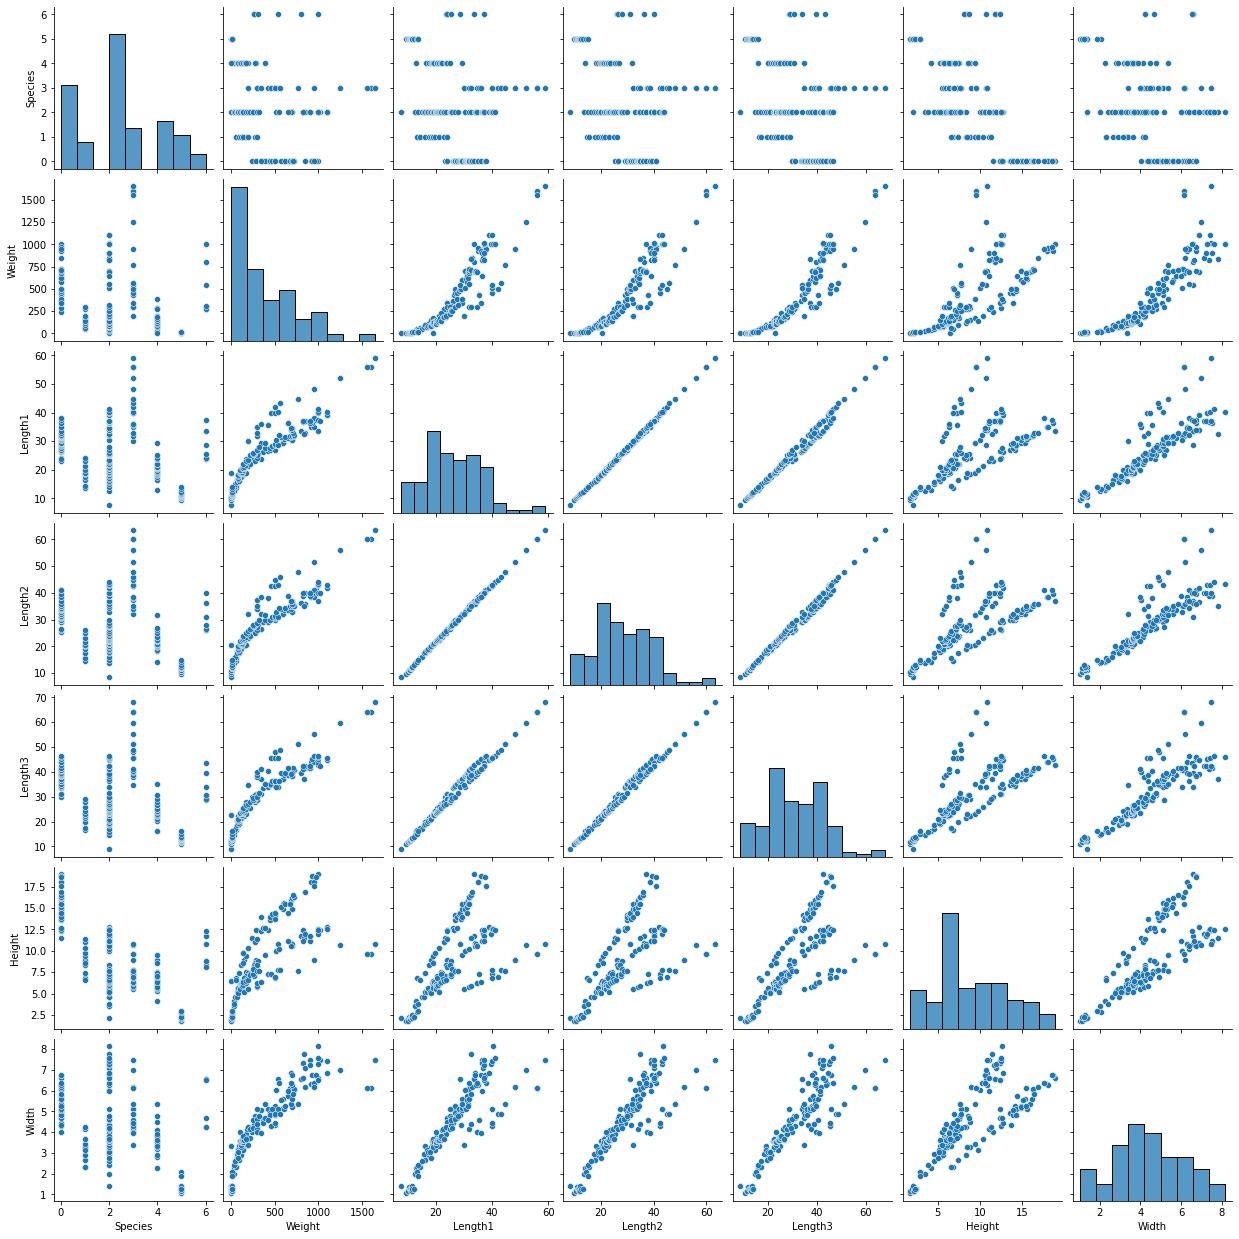

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
dummy=pd.get_dummies(data.Species,drop_first=True)
data=pd.concat([data,dummy],axis=1)
data.drop(['Species'],axis=1,inplace=True)
data.head()

,Weight,Length1,Length2,Length3,Height,Width,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [16]:
X = data.drop('Weight',axis=1)
y = data['Weight']

In [17]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=86)

In [18]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[0.94929846 0.94206389 0.88969424 0.937901   0.92670966]


In [19]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [20]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  15368.887673472023
R2 Score:  0.8344438760937495


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1=make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [22]:
model_1.score(X_test,y_test)

0.8344438760937503

In [23]:
y_pred=model_1.predict(X_test)
mean_absolute_error(y_test,y_pred)

84.3424105155893

In [24]:
from sklearn.ensemble import RandomForestRegressor
model2 = make_pipeline(StandardScaler(),RandomForestRegressor())

In [25]:
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [26]:
model2.score(X_test,y_test)

0.9881435838757239